In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_features = pd.read_csv("features.csv")
df_store = pd.read_csv("stores.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
# lowercase all the column names and replace spaces with _
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_store.columns = df_store.columns.str.lower().str.replace(' ', '_')
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')

In [5]:
df_features.shape

(8190, 12)

In [6]:
df_features.tail()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,7/26/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [7]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
df_features.describe()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
print(df_features.isnull().sum())

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64


#### Columns info 
- Store: Denotes the Store Number
- Date: Dates (Data) from 2010 - 2012
- Temperature: Temperature in Fahrenheit
- Fuel Price: Price of Fuel that day
- Markdown1, Markdown2, Markdown3, Markdown4: Anonymized data related to promotional markdowns at Walmart
- CPI: The consumer price index. It measures the monthly changes in prices paid by US consumers
- Unemployement: Rate of Unemployment
- IsHoliday: Is that particular day holiday or working day

In [10]:
# Handle missing values
df_features["cpi"] = df_features["cpi"].fillna(df_features["cpi"].median())
df_features["unemployment"] = df_features["unemployment"].fillna(df_features["unemployment"].median())


In [11]:
print(df_features.isnull().sum())

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi                0
unemployment       0
isholiday          0
dtype: int64


In [12]:
# replacing the markdown values with 0, as there is no information in the dataset on how these values are obtained and what they actually mean
for i in range(1, 6):
    # Replace negative values with 0
    df_features["markdown" + str(i)] = df_features["markdown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    # Fill missing values with 0
    df_features["markdown" + str(i)] = df_features["markdown" + str(i)].fillna(0)


In [13]:
print(df_features.isnull().sum())

store           0
date            0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
isholiday       0
dtype: int64


In [14]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     8190 non-null   float64
 5   markdown2     8190 non-null   float64
 6   markdown3     8190 non-null   float64
 7   markdown4     8190 non-null   float64
 8   markdown5     8190 non-null   float64
 9   cpi           8190 non-null   float64
 10  unemployment  8190 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
print(df_train.shape)

(421570, 5)


In [16]:
print(df_store.shape)

(45, 3)


In [17]:
print(df_features.shape)

(8190, 12)


## Merging dataset

In [18]:
train_df = pd.merge(df_train,df_store,on='store',how='left')

In [19]:
train_df.head()

,store,dept,date,weekly_sales,isholiday,type,size
0,1,1,2/5/2010,24924.50,False,A,151315
1,1,1,2/12/2010,46039.49,True,A,151315
2,1,1,2/19/2010,41595.55,False,A,151315
3,1,1,2/26/2010,19403.54,False,A,151315
4,1,1,3/5/2010,21827.90,False,A,151315


In [20]:
df_features.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday
0,1,2/5/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [21]:
print(df_features.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')


In [22]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['store', 'date'], how='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_store, on='store', how='inner')

In [23]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   date          421570 non-null  object 
 2   temperature   421570 non-null  float64
 3   fuel_price    421570 non-null  float64
 4   markdown1     421570 non-null  float64
 5   markdown2     421570 non-null  float64
 6   markdown3     421570 non-null  float64
 7   markdown4     421570 non-null  float64
 8   markdown5     421570 non-null  float64
 9   cpi           421570 non-null  float64
 10  unemployment  421570 non-null  float64
 11  isholiday_x   421570 non-null  bool   
 12  dept          421570 non-null  int64  
 13  weekly_sales  421570 non-null  float64
 14  isholiday_y   421570 non-null  bool   
 15  type          421570 non-null  object 
 16  size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [24]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'],errors='coerce')
final_merged_df.sort_values(by=['date'],inplace=True)
final_merged_df.set_index(final_merged_df.date, inplace=True)
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_x,dept,weekly_sales,isholiday_y,type,size
date,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,False,A,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,False,B,103681


In [25]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['isholiday_x'].isin(final_merged_df['isholiday_y']).all()

np.True_

In [26]:
#Since these two columns are same so drop any one column and make another column as IsHoliday
final_merged_df.drop(columns='isholiday_x',inplace=True)
final_merged_df.rename(columns={"isholiday_y" : "holiday"}, inplace=True)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  holiday       421570 non-null  bool          
 14  type          421570 non-null  object        
 15  s

In [27]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,holiday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,False,A,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,3,14612.19,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,4,26323.15,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,5,36414.63,False,B,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,6,11437.81,False,B,103681


In [28]:
final_merged_df.describe()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,size
count,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,2011-06-18 08:30:31.963375360,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123,136727.915739
min,1.000000,2010-02-05 00:00:00,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,2010-10-08 00:00:00,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,2011-06-17 00:00:00,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,2012-02-24 00:00:00,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,2012-10-26 00:00:00,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000
std,12.785297,NaN,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519,60980.583328


In [29]:
#Outlier Detection and Abnormalities
agg_data = final_merged_df.groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,store,dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [30]:
agg_data.isnull().sum()

store      0
dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [31]:
nan_std_groups = agg_data[agg_data['std'].isnull()]
print(nan_std_groups)


      store  dept      max      min     mean   median  std
211       3    78     6.00     6.00     6.00     6.00  NaN
216       3    83    19.33    19.33    19.33    19.33  NaN
264       4    39     1.56     1.56     1.56     1.56  NaN
362       5    78     6.00     6.00     6.00     6.00  NaN
512       7    78    12.00    12.00    12.00    12.00  NaN
529       7    99    15.00    15.00    15.00    15.00  NaN
738      10    77  1590.00  1590.00  1590.00  1590.00  NaN
908      12    99    29.88    29.88    29.88    29.88  NaN
949      13    43     1.07     1.07     1.07     1.07  NaN
969      13    77  1272.00  1272.00  1272.00  1272.00  NaN
1027     14    43     0.25     0.25     0.25     0.25  NaN
1100     15    37    -2.50    -2.50    -2.50    -2.50  NaN
1143     15    99    29.88    29.88    29.88    29.88  NaN
1219     16    99    59.76    59.76    59.76    59.76  NaN
1295     17    99     2.29     2.29     2.29     2.29  NaN
1332     18    39    28.00    28.00    28.00    28.00  N

In [32]:
agg_data['std'] = agg_data['std'].fillna(0)

In [33]:
agg_data.isnull().sum()

store     0
dept      0
max       0
min       0
mean      0
median    0
std       0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

final_merged_df['holiday'] = label_encoder.fit_transform(final_merged_df['holiday'])
final_merged_df['type'] = label_encoder.fit_transform(final_merged_df['type'])

In [35]:
final_merged_df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,holiday,type,size
date,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,0,0,151315
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,3,14612.19,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,4,26323.15,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,5,36414.63,0,1,103681
2010-02-05,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,6,11437.81,0,1,103681


In [36]:
final_merged_df['dept'].nunique()

81

In [37]:
final_merged_df['holiday'].nunique()

2

In [38]:
final_merged_df['type'].nunique()

3

## plotting stores by weekely sales

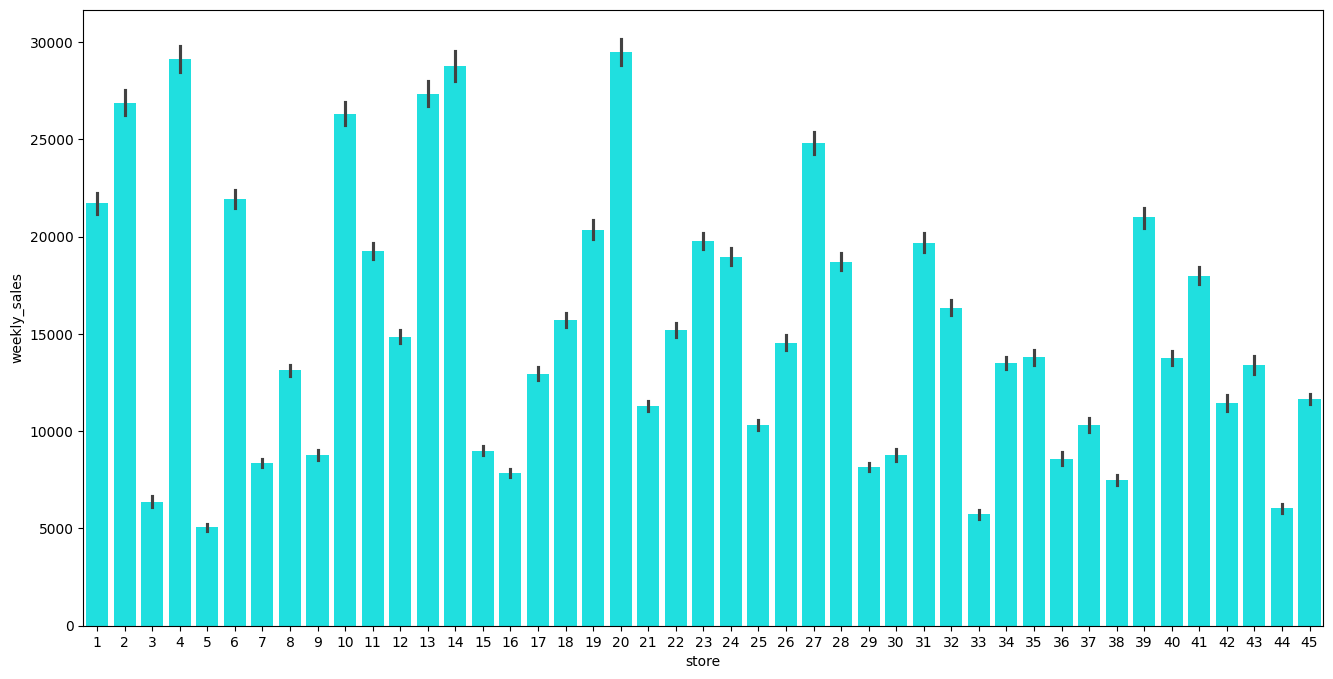

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(x='store',y='weekly_sales',data=final_merged_df, color="cyan")
plt.show()

In [40]:
## Calculating weekely sales by stores
total_sales = final_merged_df.groupby('store')['weekly_sales'].sum().reset_index()

# Sorting stores by total weekly sales in descending order
total_sales = total_sales.sort_values(by='weekly_sales', ascending=False)

print(total_sales)

    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515

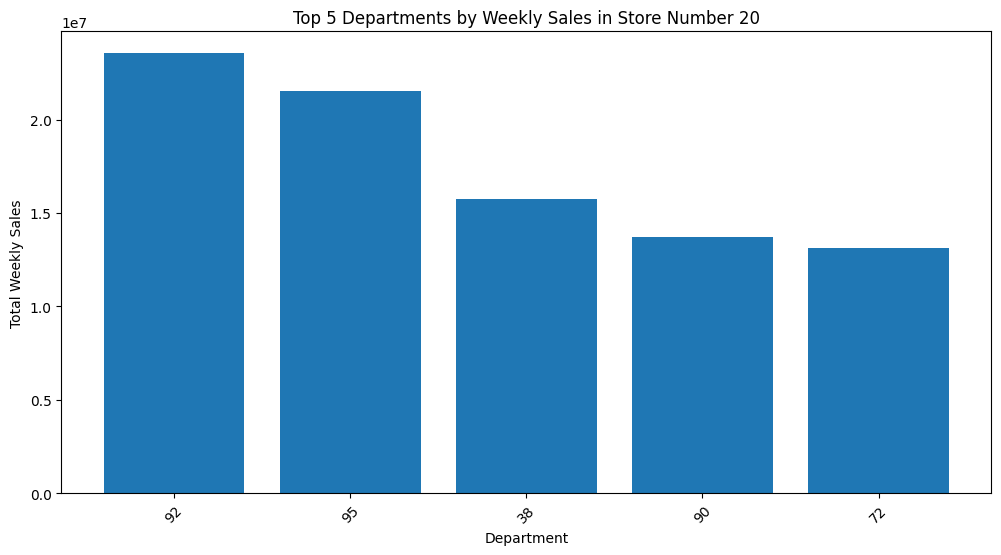

In [41]:
# <= Top 5 departments by weekly sales of Store 20 =>

# Filtering the DataFrame for store number 20
store_20_df = final_merged_df[final_merged_df['store'] == 20]

# Aggregating weekly sales by department
department_sales = store_20_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the top 5 departments
top_departments = department_sales.sort_values(by='weekly_sales', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_departments['dept'].astype(str), top_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Top 5 Departments by Weekly Sales in Store Number 20')
plt.xticks(rotation=45)
plt.show()

In [43]:
# data = pd.read_csv("final_preprocessed_dataset.csv")

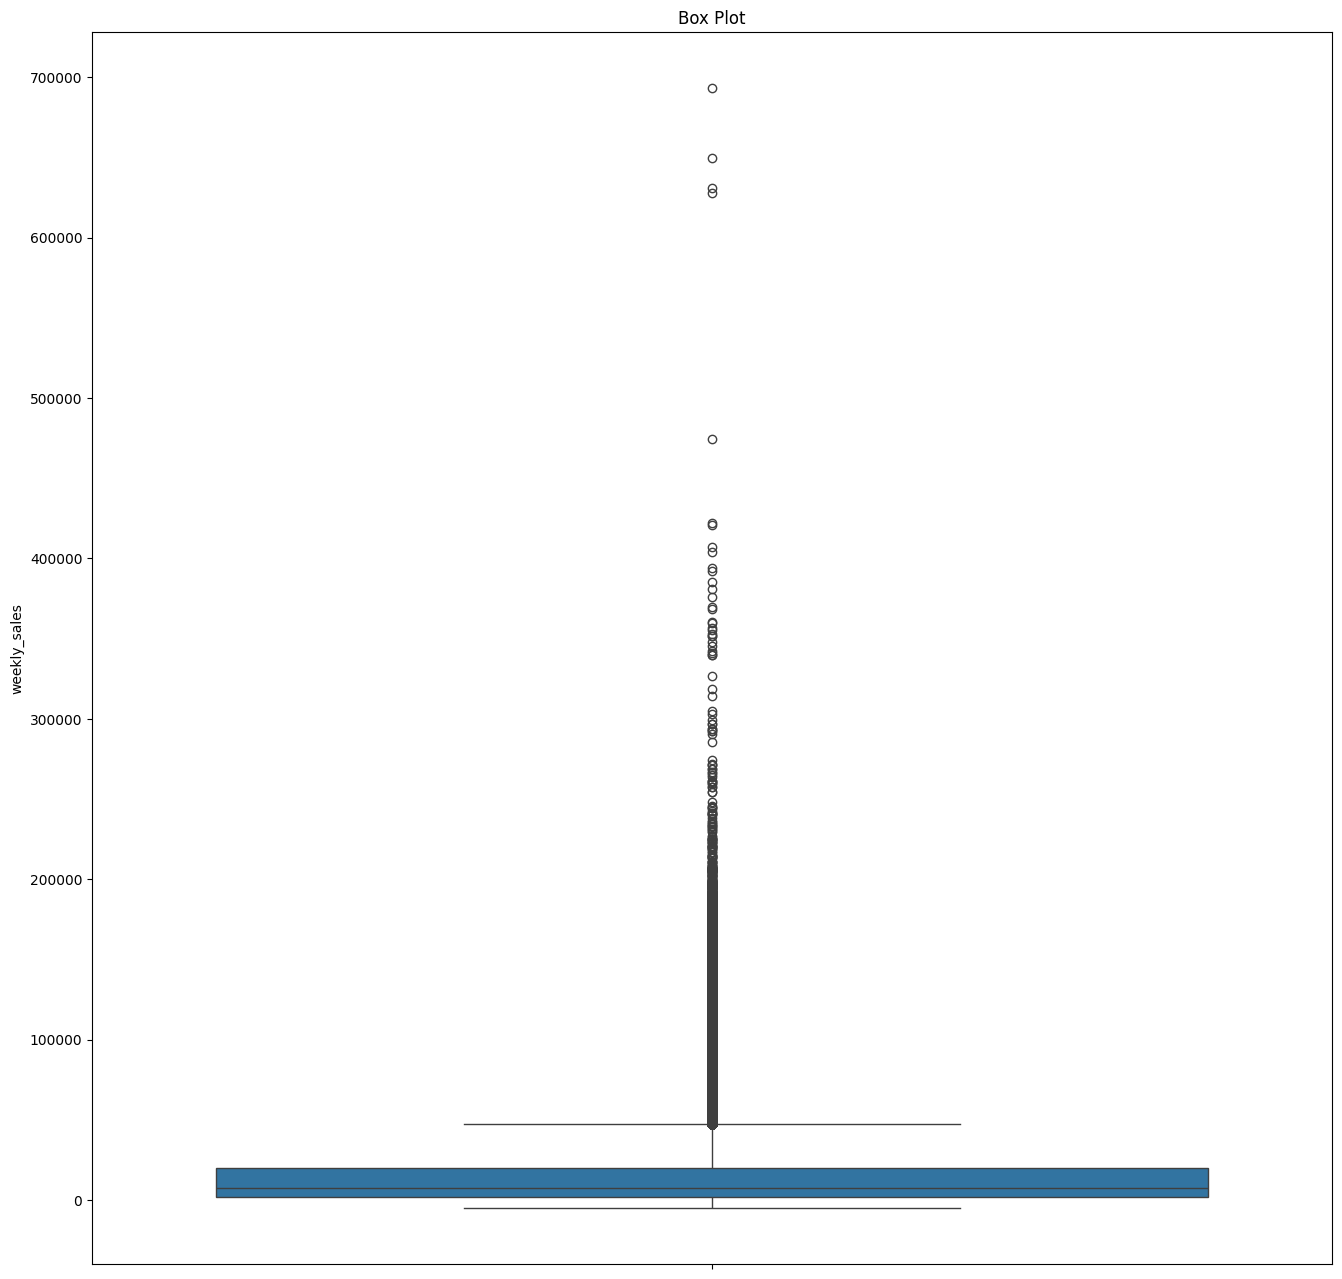

Original data shape: (421570, 16)


In [44]:
# Box plot for 'Item_Outlet_Sales'
plt.figure(figsize=(16, 16))
sns.boxplot(final_merged_df['weekly_sales'])
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.show()

print(f"Original data shape: {final_merged_df.shape}")


In [45]:
# Convert the date column to datetime format if it's not already
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])


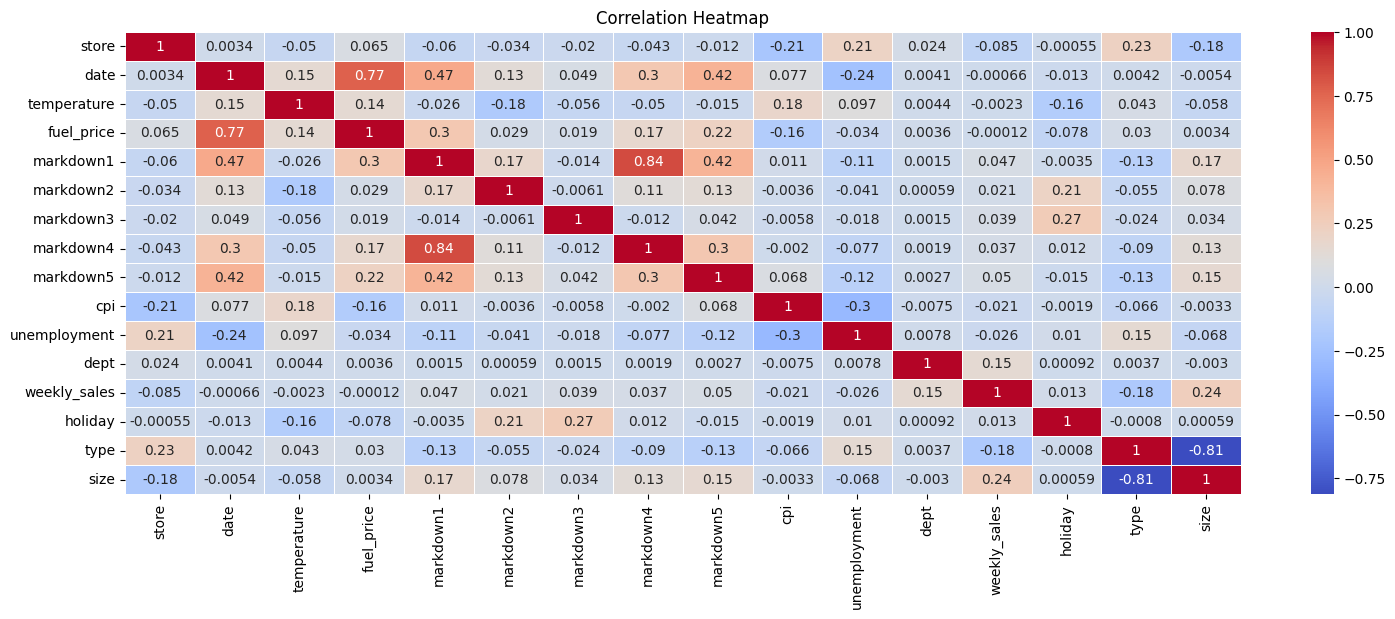

In [46]:
# Correlation Heatmap
# Plot the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(final_merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# # Using IQR method
# Q1 = final_merged_df.quantile(0.25)
# Q3 = final_merged_df.quantile(0.75)
# IQR = Q3 - Q1

In [48]:
# final_merged_df = final_merged_df[~((final_merged_df < (Q1 - 1.5 * IQR)) | (final_merged_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [49]:
#  # Box plot for 'Item_Outlet_Sales'
# plt.figure(figsize=(16, 8))
# sns.boxplot(final_merged_df['weekly_sales'])
# plt.title('Box Plot')
# plt.xticks(rotation=45)
# plt.show()

# print(f"Original data shape: {final_merged_df.shape}")


In [51]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(final_merged_df['weekly_sales'])

# Set a threshold (e.g., 3 standard deviations)
threshold = 3
filtered_df = final_merged_df[np.abs(z_scores) < threshold]

print(f"Original data shape: {final_merged_df.shape}")
print(f"Data shape after outlier removal: {filtered_df.shape}")


Original data shape: (421570, 16)
Data shape after outlier removal: (412722, 16)


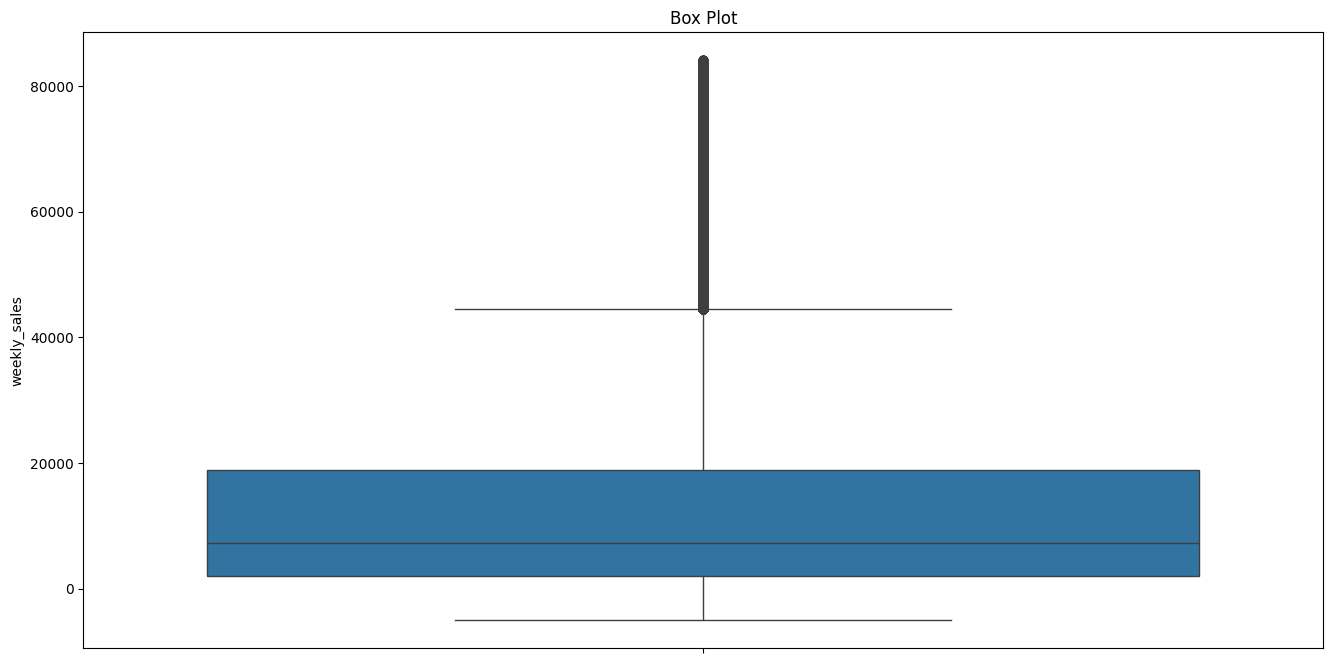

Original data shape: (421570, 16)
Data shape after outlier removal: (412722, 16)


In [53]:
 # Box plot for 'Item_Outlet_Sales'
plt.figure(figsize=(16, 8))
sns.boxplot(filtered_df['weekly_sales'])
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.show()

print(f"Original data shape: {final_merged_df.shape}")
print(f"Data shape after outlier removal: {filtered_df.shape}")

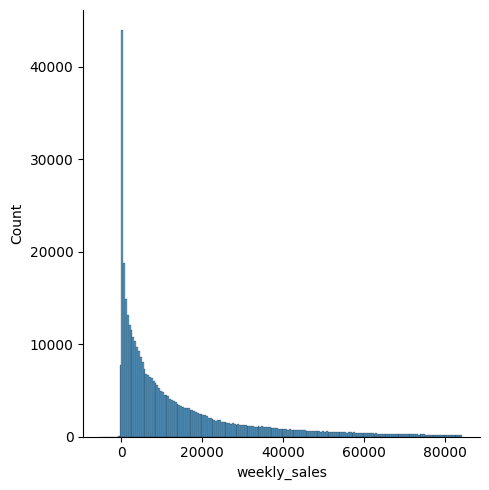

In [54]:
sns.displot(filtered_df['weekly_sales'] )

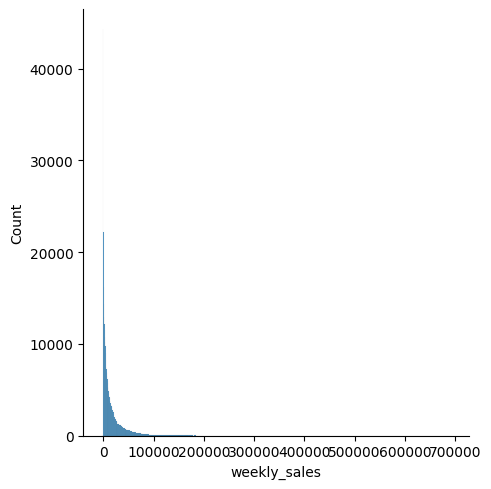

In [55]:
sns.displot(final_merged_df['weekly_sales'] )   #old data

## save the preprocessed data

In [57]:
filtered_df.to_csv(r'final_preprocessed_dataset.csv', index=False)


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error


In [57]:
# Step 5: Train-Test Split


X = filtered_df.drop(['date','weekly_sales'], axis=1)  # Assuming 'sales' is the target variable
y = filtered_df['weekly_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# # Hyperparameter Tuning using Elbow Method


# n_estimators_range = range(50, 501, 500)
# mse_scores = []

# for n in n_estimators_range:
#     model = GradientBoostingRegressor(n_estimators=n, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     mse_scores.append(mse)

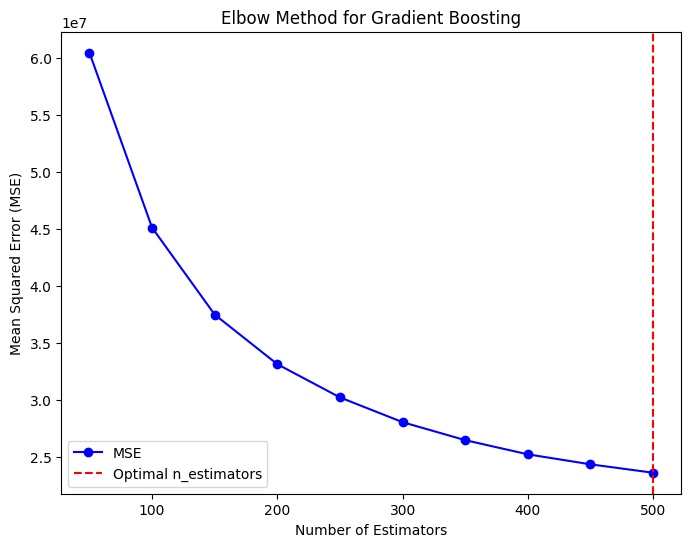

In [95]:

# # Plot Elbow Curve

# plt.figure(figsize=(8, 6))
# plt.plot(n_estimators_range, mse_scores, marker='o', color='b', label='MSE')
# plt.xlabel("Number of Estimators")
# plt.ylabel("Mean Squared Error (MSE)")
# plt.title("Elbow Method for Gradient Boosting")
# plt.axvline(x=n_estimators_range[np.argmin(mse_scores)], color='r', linestyle='--', label='Optimal n_estimators')
# plt.legend()
# plt.show()

In [1]:
# # Optimal n_estimators
# optimal_n_estimators = n_estimators_range[np.argmin(mse_scores)]
# print("Optimal Number of Estimators:", optimal_n_estimators)

In [59]:
# Train Final Model
final_model = GradientBoostingRegressor(n_estimators=500, random_state=42)
final_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=500, random_state=42)

In [60]:
# Step 7: Evaluation
y_pred = final_model.predict(X_test)
y_pred

array([ 6309.54273035, 12545.39565182, 54112.68836549, ...,
        4139.2574494 ,  -202.60815382, 34975.61253648])

In [61]:
mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse)


Root Mean Squared Error: 6623.321415134771


In [62]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 4264.568213221549


In [63]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8466723211183638


In [64]:
# # Example: Threshold for classifying sales as high (1) or low (0)
# threshold = y_test.mean()
# y_pred_class = (y_pred >= threshold).astype(int)
# y_test_class = (y_test >= threshold).astype(int)


In [65]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(y_test_class, y_pred_class)
# recall = recall_score(y_test_class, y_pred_class)
# f1 = f1_score(y_test_class, y_pred_class)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


Precision: 0.8378894918262175
Recall: 0.8934459041449835
F1 Score: 0.8647763296935541


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82545 entries, 201942 to 281340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         82545 non-null  int64  
 1   temperature   82545 non-null  float64
 2   fuel_price    82545 non-null  float64
 3   markdown1     82545 non-null  float64
 4   markdown2     82545 non-null  float64
 5   markdown3     82545 non-null  float64
 6   markdown4     82545 non-null  float64
 7   markdown5     82545 non-null  float64
 8   cpi           82545 non-null  float64
 9   unemployment  82545 non-null  float64
 10  dept          82545 non-null  int64  
 11  holiday       82545 non-null  int64  
 12  type          82545 non-null  int64  
 13  size          82545 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 9.4 MB


In [67]:
# Step 8: Predict Future Sales
future_predictions = final_model.predict(X_test.head(5))
print("Future Sales Predictions for Sample Data:\n", future_predictions)

Future Sales Predictions for Sample Data:
 [ 6309.54273035 12545.39565182 54112.68836549  1822.46117641
 17446.43051363]


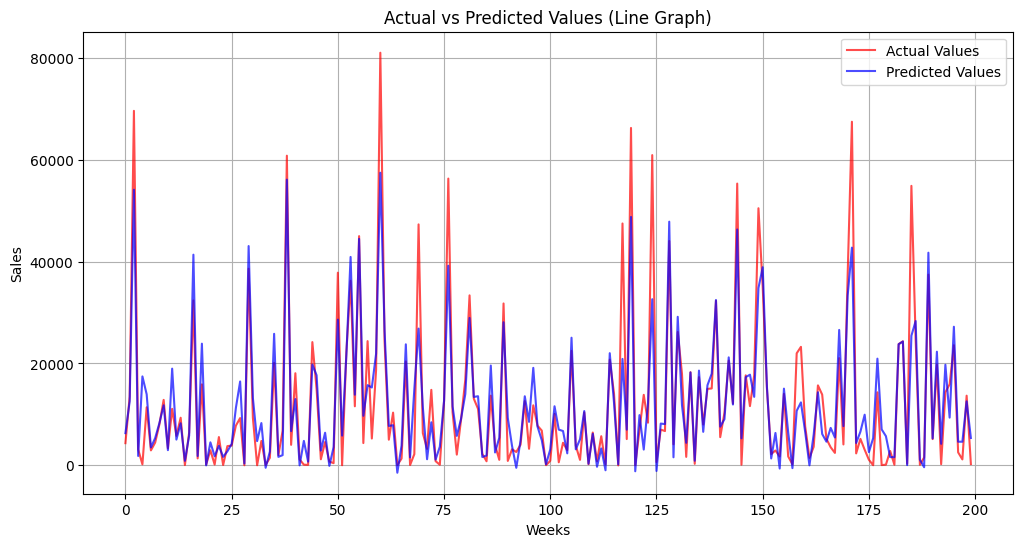

In [71]:
# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label="Actual Values", color="red", linestyle="-", alpha=0.7)
plt.plot(y_pred[:200], label="Predicted Values", color="blue", linestyle="-", alpha=0.7)

# Adding labels, title, and legend
plt.title("Actual vs Predicted Values (Line Graph)")
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
